# MLP Multivariate

In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import keras
from keras.activations import sigmoid
from keras.models import Sequential
from keras import models, layers, backend, optimizers
from keras.layers import Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
import time
from math import sqrt

In [29]:
# read the dataframe and assign the time column as the index values of the dataframe
file = "./dataset.csv"
df = pd.read_csv(file, index_col='Date', parse_dates=True)
df.head()

,AUD,EUR,NZD,GBP,BRL,CAD,CNY,DKK,HKD,INR,...,CHF,TWD,THB,VEB,gdpGBP,gdpUSD,GBR_Value,USA_Value,liborUSD,liborGBP
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-01,0.6315,0.9731,0.4904,1.6150,1.795,1.4468,8.2774,7.6445,7.7807,43.62,...,1.6540,31.75,37.51,0.6563,100.9050,101.5818,NaN,NaN,5.84138,5.97114
2000-03-01,0.6067,0.9700,0.4853,1.5849,1.769,1.4470,8.2786,7.6730,7.7824,43.63,...,1.6568,30.75,38.11,0.6630,100.9352,101.6581,NaN,NaN,5.96000,5.88913
2000-05-01,0.5800,0.9120,0.4835,1.5558,1.807,1.4783,8.2799,8.1695,7.7890,43.67,...,1.7135,30.65,38.12,0.6758,100.9194,101.7747,NaN,NaN,6.43857,5.99906
2000-06-01,0.5721,0.9307,0.4561,1.4915,1.821,1.4910,8.2771,8.0225,7.7920,44.65,...,1.6878,30.90,39.19,0.6818,100.8875,101.7674,NaN,NaN,6.66582,5.99415
2000-08-01,0.5805,0.9228,0.4546,1.4992,1.786,1.4892,8.2788,8.0840,7.7993,45.15,...,1.6758,31.15,41.09,0.6880,100.8101,101.6210,NaN,NaN,6.57688,5.94362


In [30]:
# extract columns
df.columns

Index(['AUD', 'EUR', 'NZD', 'GBP', 'BRL', 'CAD', 'CNY', 'DKK', 'HKD', 'INR',
       'JPY', 'MYR', 'MXN', 'NOK', 'ZAR', 'SGD', 'KRW', 'LKR', 'SEK', 'CHF',
       'TWD', 'THB', 'VEB', 'gdpGBP', 'gdpUSD', 'GBR_Value', 'USA_Value',
       'liborUSD', 'liborGBP'],
      dtype='object')

In [31]:
# move the response variable to the end of the dataframe
df = df[['AUD', 'EUR', 'NZD', 'BRL', 'CAD', 'CNY', 'DKK', 'HKD', 'INR',
       'JPY', 'MYR', 'MXN', 'NOK', 'ZAR', 'SGD', 'KRW', 'LKR', 'SEK', 'CHF',
       'TWD', 'THB', 'VEB', 'gdpGBP', 'gdpUSD', 'GBR_Value', 'USA_Value',
       'liborGBP', 'liborUSD', 'GBP']]
df.tail()

,AUD,EUR,NZD,BRL,CAD,CNY,DKK,HKD,INR,JPY,...,TWD,THB,VEB,gdpGBP,gdpUSD,GBR_Value,USA_Value,liborGBP,liborUSD,GBP
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-01,1.522934,0.920376,1.630278,4.919647,1.338190,7.156337,6.860283,7.819398,82.963015,146.152438,...,31.293190,35.328375,3.615638e+06,99.75476,100.4912,-2.506553,-2.901892,5.32646,5.43596,0.785825
2024-03-01,1.531798,0.923196,1.638305,4.948222,1.355491,7.195813,6.881556,7.829028,82.858687,150.202446,...,31.599983,35.869689,3.607648e+06,99.75476,100.4912,-2.506553,-2.901892,5.31892,5.43989,0.790470
2024-04-01,1.542390,0.931698,1.682959,5.066569,1.358095,7.230758,6.949495,7.826226,83.534071,151.736060,...,32.078999,36.605359,3.622553e+06,99.75476,100.4912,-2.506553,-2.901892,NaN,5.43280,0.797231
2024-05-01,1.539960,0.936355,1.694729,5.195355,1.376123,7.240092,6.984115,7.823491,83.459362,157.652264,...,32.567931,37.090729,3.640492e+06,99.75476,100.4912,-2.506553,-2.901892,NaN,5.43724,0.800790
2024-06-01,1.502668,0.921543,1.627486,5.246579,1.363570,7.241527,6.876751,7.818941,83.444154,157.315859,...,32.510895,36.804568,3.645190e+06,99.75476,100.4912,-2.506553,-2.901892,NaN,5.44784,0.784984


In [32]:
# scale the multivariate data for the network approximation
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
X = pd.DataFrame(df_scaled, columns=df.columns)
X.tail()

,AUD,EUR,NZD,BRL,CAD,CNY,DKK,HKD,INR,JPY,...,TWD,THB,VEB,gdpGBP,gdpUSD,GBR_Value,USA_Value,liborGBP,liborUSD,GBP
198,0.955040,0.136013,0.887091,0.803344,0.597861,0.484746,0.521320,0.722679,0.987142,0.858971,...,0.494125,0.366851,0.000009,0.844972,0.859716,0.586449,0.709985,0.879043,0.813800,0.058156
199,0.963254,0.139719,0.892858,0.810168,0.624486,0.502849,0.526516,0.809783,0.984793,0.908639,...,0.534894,0.399738,0.000009,0.844972,0.859716,0.586449,0.709985,0.877789,0.814395,0.061532
200,0.973069,0.150893,0.924939,0.838431,0.628493,0.518875,0.543111,0.784439,1.000000,0.927446,...,0.598549,0.444433,0.000009,0.844972,0.859716,0.586449,0.709985,NaN,0.813322,0.066446
201,0.970817,0.157013,0.933394,0.869187,0.656237,0.523155,0.551567,0.759701,0.998318,1.000000,...,0.663521,0.473920,0.000009,0.844972,0.859716,0.586449,0.709985,NaN,0.813994,0.069032
202,0.936260,0.137547,0.885086,0.881420,0.636919,0.523813,0.525342,0.718546,0.997975,0.995874,...,0.655942,0.456535,0.000009,0.844972,0.859716,0.586449,0.709985,NaN,0.815599,0.057545


In [33]:
def CreateLaggedSequence(data, lag):
    # make two lists for PredictorSequences and ResponseVariables
    PredictorSequences, ResponseVariables = list(), list()
    for i in range(len(data)):
        # mark the range of the sequence
        end_i = i + lag
        # check when the data ends
        if end_i+1 > len(data):
            # stop sequence creation
            break
        # get the predictors and responses
        PredictorSequence = data[i:end_i]
        ResponseVariable = data[end_i, -1]
        # append them to the lists
        PredictorSequences.append(PredictorSequence)
        ResponseVariables.append(ResponseVariable)
        # print(end_i)
    return np.array(PredictorSequences), np.array(ResponseVariables)

In [34]:
# Define input parameters
NumberOfFeatures = len(df.columns)
lag = 5
# create the lagged values for the series (5 lags)
np_X = np.array(X)
X, y = CreateLaggedSequence(np_X, lag)
# Reshape it for the process
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2])
X.shape, y.shape

((198, 145), (198,))

In [35]:
# split the train and test sets (last 50 observation spared for the test)
x_train, x_test = X[:-50], X[-50:]
y_train, y_test = y[:-50], y[-50:]
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((148, 145), (50, 145), (148,), (50,))

In [36]:
# define new activation function
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))

from keras.utils import get_custom_objects
from keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})

In [37]:
# create a start point for timer
start = time.time()

# design the model
backend.clear_session()
model = models.Sequential()

model.add(layers.Dense(3*2**10, activation='swish', kernel_initializer='he_uniform', input_shape = (x_train.shape[1],)))
# model.add(BatchNormalization())
model.add(layers.Dense(3*2**8, activation='swish', kernel_initializer='he_uniform'))
# model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(layers.Dense(3*2**6, activation='swish', kernel_initializer='he_uniform'))
# model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(layers.Dense(3*2**4, activation='swish', kernel_initializer='he_uniform'))
# model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(layers.Dense(3*2**2, activation='swish', kernel_initializer='he_uniform'))
# model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(layers.Dense(3*2**0, activation=tf.keras.backend.sin, kernel_initializer='he_uniform'))
# model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(layers.Dense(1, activation='swish'))

# compile the model
model.compile(optimizer = optimizers.Adam(learning_rate=0.00007), loss = 'mse', metrics = ['mae'])
#get the summary of the model
model.summary()

################################################################################

# fit the model
history = model.fit(x_train, y_train, 
            epochs = 2**10, 
            batch_size = 3892, 
            validation_split = 0.20, # sparing validation data from the training data
            verbose = 1, 
            callbacks=[EarlyStopping(monitor='val_mae', patience=2**6, restore_best_weights = True)])  # restore the best values

#evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_acc:', test_acc)

# end the timer and print the total time passed
end = time.time()
print("Total time:", end-start, "seconds")

/Users/tranphuctho276/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3072)           │       448,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 768)            │     2,360,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 192)            │       147,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 48)             │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 12)             │           588 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            39 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,966,119 (11.31 MB)

 Trainable params: 2,966,119 (11.31 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1024
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/1024
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/1024
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/1024
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/1024
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/1024
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/1024
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/1024
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/1024
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/1024
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - 

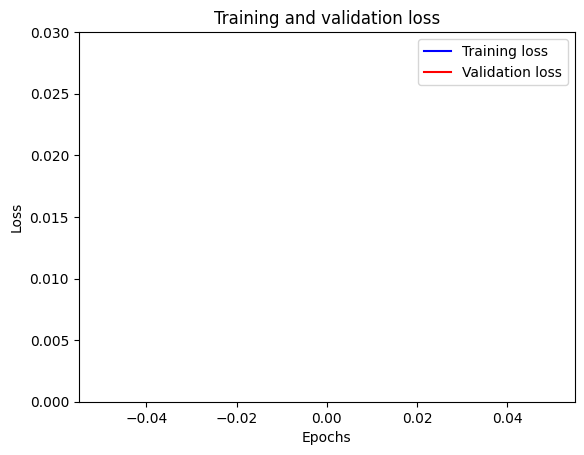

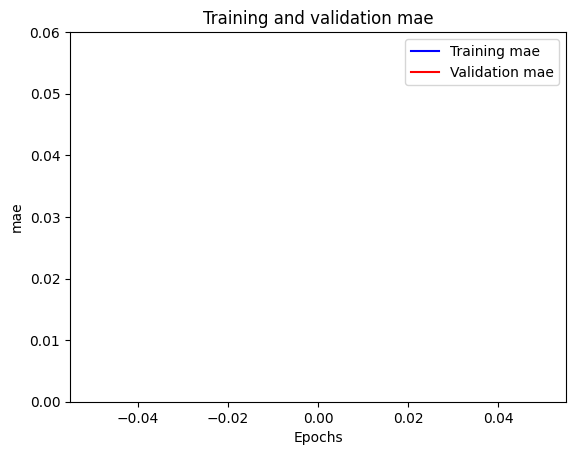

In [38]:
# get the history of the fitting process
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']
epochs = range(1, len(history_dict['mae']) + 1)
# plot the training and validation losses
plt.plot(epochs, loss_values, label = 'Training loss', color='blue')
plt.plot(epochs, val_loss_values, label = 'Validation loss', color='red')
plt.ylim(0,0.03)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# plot the training and validation mae (mean absolute error)
plt.plot(epochs, mae_values, label = 'Training mae', color='blue')
plt.plot(epochs, val_mae_values, label = 'Validation mae', color='red')
plt.ylim(0,0.06)
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [39]:
# predict the model on the test set (scaled)
yhat_scaled = model.predict(x_test, verbose=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [40]:
# insert the scaled predictions into the scaled dataframe
df_scaled[-len(yhat_scaled):] = yhat_scaled
# invert the scaled data (with the predictions) back to real values
df_inverted = scaler.inverse_transform(df_scaled)
# convert the data to dataframe
df_invertedDF = pd.DataFrame(df_inverted, columns=df.columns, index=df.index)

In [41]:
# convert the predictions series
predictions = df_invertedDF.iloc[-len(yhat_scaled):, -1]
# extract the actual values
actuals = df['GBP'][-50:]

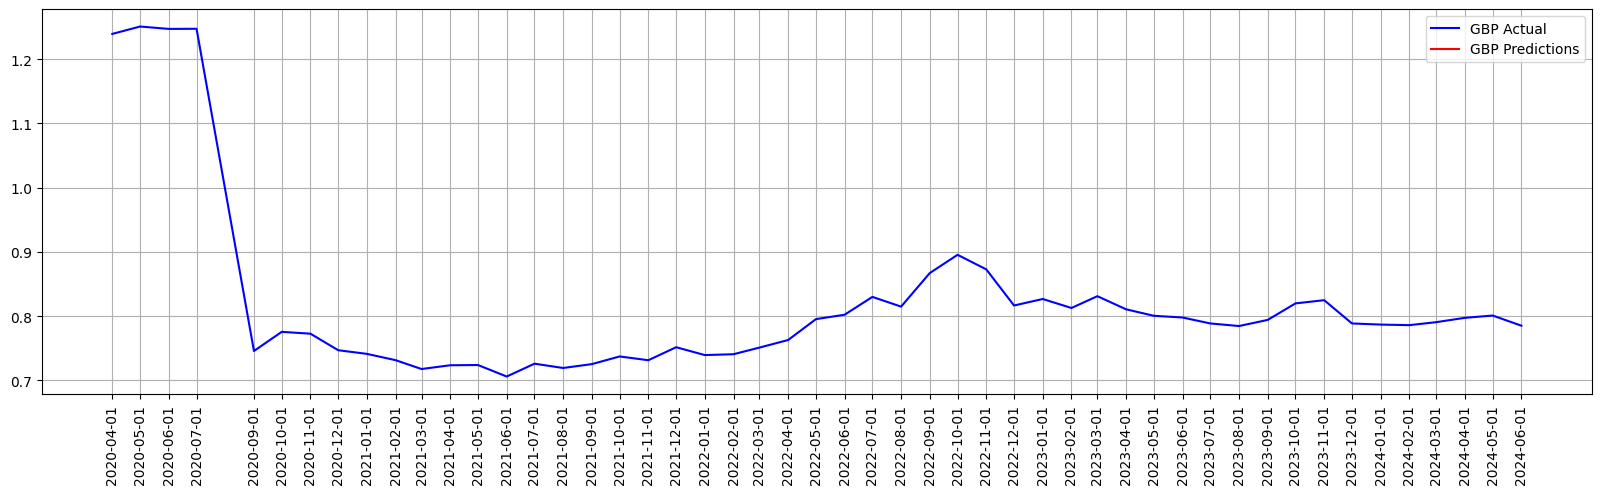

ValueError: Input contains NaN.

In [42]:
# evaluate forecasts and plot them together
plt.figure(figsize=(20,5))
plt.plot(actuals.index, actuals, color='blue')
plt.plot(actuals.index, predictions, color='red')
plt.legend(('GBP Actual', 'GBP Predictions'))
plt.xticks(actuals.index, rotation=90)
plt.grid(True)
plt.show()

rmse = sqrt(mean_squared_error(actuals, predictions))
print('Test RMSE: %.5f' % rmse)